# Engineering Statistics & Probability
# Final Project
## Nikoo Moradi _ 400101934
## Tina Halimi _ 400101078

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import beta, lognorm, gamma, poisson, expon, norm, chisquare
import pandas as pd
import sympy as sp
!pip install markovchain

## Markov Chain

### Theoretical question 1 :

1) Weather Forecast:
Let's say we want to predict the weather in a city. We can model the weather using a Markov chain. We define a few weather states, such as sunny, cloudy, and rainy. The current weather state determines the probabilities of transitioning to different weather states the next day. For example, if it is sunny today, there might be a 70% chance of it being sunny tomorrow, a 20% chance of it being cloudy, and a 10% chance of it being rainy. These transition probabilities capture the typical weather patterns observed in that city. By simulating the Markov chain over several days, we can make predictions about the future weather.

2) Web Page Navigation:
Consider a website with three pages: Home, About, and Contact. Users can navigate between these pages. We can model this navigation using a Markov chain. Each page represents a state, and the transitions between pages represent the user's clicks. Let's say that from the Home page, there's a 40% chance the user will go to the About page, a 30% chance they will go to the Contact page, and a 30% chance they will stay on the Home page. From the About page, there's a 50% chance they will go back to the Home page and a 50% chance they will go to the Contact page. From the Contact page, there's a 70% chance they will go back to the Home page and a 30% chance they will go to the About page. These transition probabilities represent the user behavior patterns on the website. By analyzing the Markov chain, we can understand how users navigate between pages and optimize the website's design or content accordingly.

### Theoretical question 2 :

To prove that $L_n = L \cdot (P^n)$, where $L_n$ represents the distribution of the Markov chain at time $n$ and $L$ represents the initial distribution, we can use mathematical induction.

First, let's define some terms:

- $L$: The initial distribution vector of the Markov chain. It represents the probabilities of being in each state at time $n = 0$. It is a row vector of dimension $1 \times m$, where $m$ is the number of states.
- $P$: The transition matrix of the Markov chain. It represents the probabilities of transitioning from one state to another. It is an $m \times m$ matrix, where $m$ is the number of states.
- $L_n$: The distribution vector of the Markov chain at time $n$. It represents the probabilities of being in each state at time $n$. It is a row vector of dimension $1 \times m$, where $m$ is the number of states.

Now, let's proceed with the proof by induction:

1. Base Case:
For $n = 0$, $L_n = L \cdot (P^0)$. Since $(P^0)$ is the identity matrix (the matrix with ones on the main diagonal and zeros elsewhere), multiplying $L$ by $(P^0)$ will yield $L$ itself. Therefore, the base case holds.

2. Inductive Hypothesis:
Assume that the equation $L_n = L \cdot (P^n)$ holds for some arbitrary value of $n = k$.

3. Inductive Step:
We need to prove that the equation holds for $n = k + 1$.

Using the inductive hypothesis, we have:
$L_k = L \cdot (P^k)$

Now, to find $L_{k+1}$, we can multiply $L_k$ by $P$:
$L_{k+1} = L_k \cdot P \\
\quad \quad \quad = (L \cdot (P^k)) \cdot P \\
\quad \quad \quad = L \cdot ((P^k) \cdot P) \\
\quad \quad \quad = L \cdot (P^{k+1})$

Therefore, the equation $L_n = L \cdot (P^n)$ holds for $n = k + 1$.

By mathematical induction, we have proved that $L_n = L \cdot (P^n)$ for all $n \geq 0$.

This means that the distribution of the Markov chain at time $n$ can be obtained by multiplying the initial distribution $L$ with the transition matrix raised to the power of $n$.

### Theoretical question 3 :

To show that $P_{ij}^{(n)}$ represents the probability of transitioning from state $S_i$ to state $S_j$ in exactly $n$ steps, let's consider the transition matrix $P$. $P_{ij}$ represents the probability of transitioning from state $S_i$ to state $S_j$ in one step.

Now, let's define $P^{(n)}$ as the matrix obtained by multiplying $P$ by itself $n$ times. Each element $P_{ij}^{(n)}$ in $P^{(n)}$ represents the probability of transitioning from state $S_i$ to state $S_j$ in exactly $n$ steps.

To prove that $P_{ij}^{(n)}$ represents the probability of transitioning from state $S_i$ to state $S_j$ in exactly $n$ steps, we can use the concept of matrix multiplication.

The element $P_{ij}^{(n)}$ can be obtained by multiplying the $i$th row of $P$ with the $j$th column of $P^{(n-1)}$. In other words:

$P_{ij}^{(n)} = (P^{(n-1)})_{i1}P_{1j} + (P^{(n-1)})_{i2}P_{2j} + \ldots + (P^{(n-1)})_{im}P_{mj}$

This expression represents the sum of all possible ways to transition from state $S_i$ to state $S_j$ in exactly $n$ steps, considering all intermediate states. Therefore, $P_{ij}^{(n)}$ indeed represents the probability of transitioning from state $S_i$ to state $S_j$ in exactly $n$ steps.

Now, let's prove that the summation of rows of $P^{(n)}$ is equal to one.

Since $P$ represents a valid transition matrix, the sum of each row in $P$ is equal to one. Therefore, for any positive integer $n$, the sum of each row in $P^{(n)}$ will also be equal to one. This property ensures that the probabilities of transitioning to any state from the current state sum up to one, satisfying the principle of probability.

Finally, it is known that a valid transition matrix $P$ has at least one eigenvalue equal to one. This eigenvalue corresponds to a steady-state distribution where the probabilities of being in each state do not change over time.

In summary, $P_{ij}^{(n)}$ represents the probability of transitioning from state $S_i$ to state $S_j$ in exactly $n$ steps. The summation of rows in $P^{(n)}$ is equal to one, and the matrix $P^{(n)}$ has at least one eigenvalue of one, representing a steady-state distribution.

### Theoretical question 4 :

If a process has a limited memory of length K, and the conditional probability of transitioning to the next state only depends on the K most recent states, then this sequence can be written as a Markov chain.

Let's denote the states of the process as $X_0, X_1, X_2, \ldots$, and consider the conditional probability of transitioning to the next state $X_{n+1}$ given the history of previous states $X_0, X_1, \ldots, X_n$.

Based on the given assumption, the conditional probability can be written as:

$P[X_{n+1} | X_0, X_1, \ldots, X_n] = P[X_{n+1} | X_n, X_{n-1}, \ldots, X_{n-K+1}]$

This means that the transition to the next state $X_{n+1}$ only depends on the K most recent states $X_n, X_{n-1}, \ldots, X_{n-K+1}$, and not on any other states in the past.

Now, let's define a new set of states $Y_0, Y_1, Y_2, \ldots$, where each state $Y_n$ represents the K-tuple of the most recent states $X_n, X_{n-1}, \ldots, X_{n-K+1}$. In other words, $Y_n = (X_n, X_{n-1}, \ldots, X_{n-K+1})$.

Since the transition to the next state $X_{n+1}$ only depends on the K most recent states, we can rewrite the conditional probability as:

$P[X_{n+1} | X_n, X_{n-1}, \ldots, X_{n-K+1}] = P[X_{n+1} | Y_n]$

This means that the transition to the next state $X_{n+1}$ only depends on the current state $Y_n$, which is the K-tuple of the most recent states.

Hence, we can define a Markov chain with states $Y_0, Y_1, Y_2, \ldots$, where the transition probabilities are given by $P[X_{n+1} | Y_n]$. Each state $Y_n$ represents the K-tuple of the most recent states, and the transition to the next state only depends on the current state $Y_n$.

Therefore, if a process has a limited memory of length K, and the conditional probability of transitioning to the next state only depends on the K most recent states, then this sequence can be written as a Markov chain.

## Communicating Classes

### Theoretical question 5 :
If  state $i$ and state $j$ communicate, then there exists a non-negative integer $n$ such that $P_{ij}^{(n)}>0$.
This means that there is a positive probability of going from state $i$ to state $j$ in $n$ steps. Therefore, there exists a trajectory from state $i$ to state $j$, namely the sequence of states $S_0=i,S_1,S_2,...,S_n=j$ such that $P_{S_{k-1},S_{k}}>0$ for all $k=0,1,2,...,n$.
The probability of being a sequence of states $S_0=i,S_1,S_2,...,S_n=j$ in a Markov chain is given by the product of the transition probabilities between consecutive states in the sequence because of the Markov property. The Markov property states that the probability of transitioning from one state to another depends only on the current state and not on the past history of the process.
Therefore, if we know the current state $S_k$, the probability of transitioning to the next state $S_{k+1}$ depends only on the transition probability $P_{S_{k},S_{k+1}}$ and not on the past history of the process. Similarly, the probability of transitioning from $S_{k+1}$ to $S_{k+2}$ depends only on the transition probability $P_{S_{k+1},S_{k+2}}$ and not on the past history of the process, and so on. Therefore, the joint probability of observing the sequence of states $S_0=i,S_1,S_2,...,S_n=j$ is given by the product of the transition probabilities between consecutive states in the sequence, $ P_{S_0,S_1}\cdot P_{S_1,S_2}\cdot \ldots \cdot P_{S_{n-1},S_n}$. this should be positive, so we have:
 $ P_{S_0,S_1}\cdot P_{S_1,S_2}\cdot \ldots \cdot P_{S_{n-1},S_n} = \prod_{i=1}^{n}{P_{S_{i-1},S_i}}>0$

Note that the converse of the statement is not true. That is, if states $i$ and $j$ communicate, it does not necessarily mean that there exists a sequence of states $S_0=i,S_1,S_2,...,S_n=j$ in the Markov chain. For example, consider a Markov chain with two states $i$ and $j$, where $P_{ij}=1$ and $P_{ji}=0$. In this case, $i$ and 
$j$ communicate, but there is no sequence of states that connects them.

### Theoretical question 6 :

Proof of the Class Structure Theorem for Markov Chains

The class structure theorem for Markov chains states that the state space of a Markov chain can be partitioned into a set of non-overlapping communicating classes. A communicating class is a subset of the state space in which every state can be reached from every other state by a sequence of transitions. In other words, a communicating class is a set of states that are all "connected" to each other in the sense that they can all be reached from each other.

The proof of the class structure theorem is based on the concept of equivalence classes. Two states i and j are said to be equivalent if i can be reached from j and j can be reached from i. Equivalence is an equivalence relation, which means that it is reflexive (i is equivalent to i), symmetric (if i is equivalent to j, then j is equivalent to i), and transitive (if i is equivalent to j and j is equivalent to k, then i is equivalent to k) .

The set of all states that are equivalent to a given state i is called the equivalence class of i. The equivalence classes form a partition of the state space, which means that every state belongs to exactly one equivalence class. The equivalence classes are also communicating classes, which means that every state in an equivalence class can be reached from every other state in the same equivalence class.

To see why the equivalence classes are communicating classes, suppose that we have two states i and j in the same equivalence class. Then, by definition, i can be reached from j and j can be reached from i. Since i and j are in 1the same equivalence class, there must be a sequence of states that connects i to j. Similarly, there must be a sequence of states that connects j to i. Therefore, every state in the equivalence class can be reached from every other state in the same equivalence class.

Conversely, suppose that we have two states i and j in different equivalence classes. Then, by definition, i cannot be reached from j and j cannot be reached from i. Therefore, the equivalence classes are non-overlapping.

Since the equivalence classes form a partition of the state space and are communicating classes, the state space of a Markov chain can be partitioned into a set of non-overlapping communicating classes. This is the class structure theorem for Markov chains.

In summary, the class structure theorem for Markov chains states that the state space of a Markov chain can be partitioned into a set of non-overlapping communicating classes. The proof of the theorem is based on the concept of equivalence classes, which are sets of states that can be reached from each other. The equivalence classes form a partition of the state space and are communicating classes, which means that every state in an equivalence class can be reached from every other state in the same equivalence class.

### Simulation question 1 :

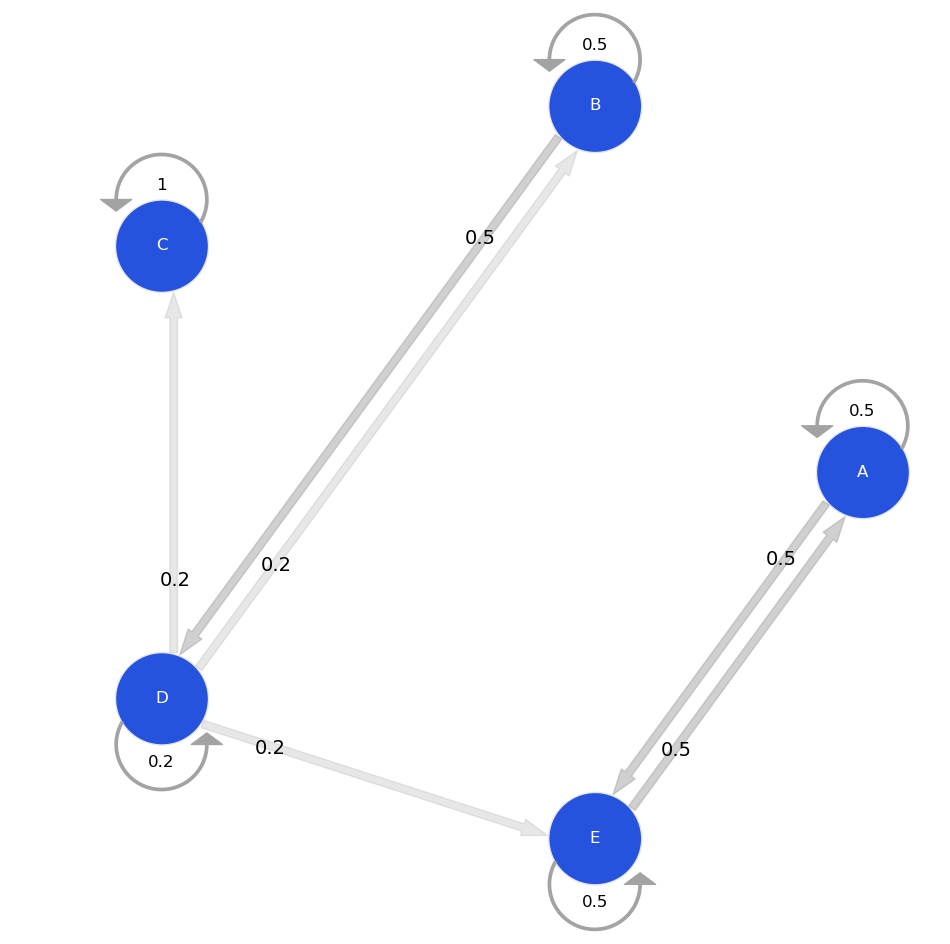

Done!


In [2]:

from markovchain import MarkovChain
import networkx as nx
import numpy as np

P = np.array([[0.5, 0, 0, 0, 0.5],
              [0, 0.5, 0, 0.5, 0],
              [0, 0, 1, 0, 0],
              [0, 0.25, 0.25, 0.25, 0.25],
              [0.5, 0, 0, 0, 0.5]])

mc = MarkovChain(P, ['A', 'B', 'C', 'D', 'E'])
mc.draw('mc.png')
print("Done!")

### Theoretical question 7 :

Every Markov chain has at least one recurrent class. A recurrent class is a set of states in which every state is recurrent, meaning that if the chain starts in any state in the class, it will return to that state with probability 1.
To prove this, we can use the fact that every Markov chain can be decomposed into irreducible classes. An irreducible class is a set of states in which every state communicates with every other state. In other words, it is not possible to partition the class into two disjoint sets that are both closed under transitions.
Suppose that there are no recurrent classes in the Markov chain. Then every class must be transient, meaning that if the chain starts in any state in the class, it will eventually leave the class and never return with probability 1.
Consider an arbitrary state in the Markov chain. Since there are no recurrent classes, the state must be in a transient class. Let 
$T$ be the expected number of steps it takes for the chain to leave the class starting from this state. Since the class is transient, 
$T$ is finite.
Now consider what happens when the chain starts in the same state again after $T$ steps. Since the class is transient, the probability that the chain is still in the class after $T$ steps is less than 1. Therefore, the probability that the chain returns to the original state after $2T$ steps is less than the probability that it leaves the class after $T$ steps and then returns to the original state after another $T$ steps.
By repeating this argument, we can show that the probability of returning to the original state after 
$nT$ steps approaches 0 as $n$ approaches infinity. This contradicts the assumption that the state is in a transient class, since it implies that the state is never visited again with probability 1. Therefore, there must be at least one recurrent class in the Markov chain.

### Theoretical question 8 :

We want to prove that $V_i | X_0=i$ has a geometric distribution with parameter $f_{ii}$, where $f_{ii}$ is the probability that the Markov chain starting at state i returns to state i for the first time.

To see why this is true, we can use the definition of $f_{ii}(n)$ as the probability that the first return time to $i$ is $n$ when we start at $i$.

Then, the probability that the first visit to state $i$ occurs on the $kth$ step is the probability of being in a state other than $i$ for the first $k-1$ steps, times the probability of transitioning to state $i$ on the kth step. 
This is given by:
$$ P(V_i = k | X_0 = i) = (1 - f_{ii})^{k-1}\cdot  f_{ii}$$

This is the probability mass function of a geometric distribution with parameter $f_{ii}$. Therefore, $V_i | X_0=i$ has a geometric distribution with parameter $f_{ii}$, which is the probability that the Markov chain starting at state $i$ returns to state $i$ for the first time.

### Theoretical question 9 :

Suppose that $i \leftrightarrow j$. The result is trivial if $i = j$, so let's assume that $i \neq j$. Recall that there exist $m, k \in \mathbb{N}^+$ such that $P_{i, j}^m > 0$ and $P_{j, i}^k > 0$. But then $P_{i,i}^{m+k} \geq P_{i, j}^m P_{j, i}^k > 0$ and hence $d(x) \mid (m+k)$.

Suppose now that $n$ is a positive integer with $P_{j, j}^n > 0$. Then $P_{i, i}^{m+k+n} \geq P_{i, j}^m P_{j, j}^n P_{j, i}^k > 0$ and hence $d(i) \mid (m+k+n)$. It follows that $d_i \mid n$.

From the definition of period, $d_j \mid d_i$. Reversing the roles of $i$ and $j$, we also have $d_i \mid d_j$. Hence $d_i = d_j$.

### Theoretical question 10 :
Given a Markov chain with $X_0 = 0$ and transition probabilities $P(X_{n+1} = i-1|X_n=i) = 1-p$ and $P(X_{n+1} = i+1|X_n=i) = p$, we can find the period of each state as follows:
If $p = 0$, then the Markov chain is periodic with period 2 for all states. This is because the Markov chain alternates between states $i-1$ and $i+1$, and it takes two steps to return to the starting state $i$. Therefore, all states have a period of 2.
If $p > 0$, then the Markov chain is periodic with period 2 for all states except state 0. State 0 is aperiodic because it is possible to return to state 0 in one step with probability $1-p$. Therefore, the period of state 0 is 1, and the period of all other states is 2.
In summary, the period of each state of the given Markov chain is:
State 0: period 1
States i where i is odd: period 2
States i where i is even: period 2
Note that the period of a state $i$ is the greatest common divisor of the set ${n ∈ : p_{i,i}^n  > 0}$, where $p_{}n (i,i)$ is the probability of returning to state i in n steps. If the greatest common divisor is 1, then the state is aperiodic. If the greatest common divisor is greater than 1, then the state is periodic with period equal to the greatest common divisor

### Simulation question 2 :

we plot the output for different values.

we observed that n doesn’t have significance effect on the final point but if we increase thresh the final point shift to right and if we decrease thresh the final point shift to left.

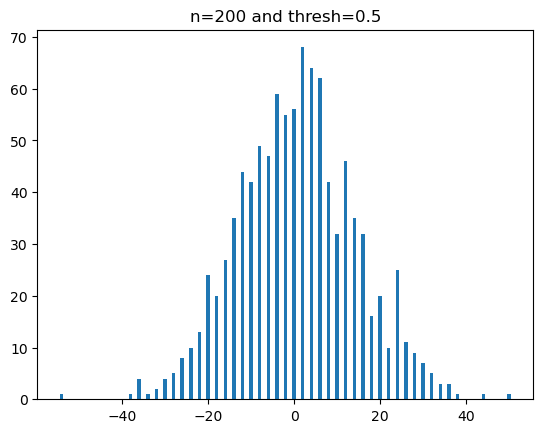

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

n = 200
thresh = 0.5
N = 1000

result = []
for run_no in range(N):
    i = 0
    for phi in range(n):
        p = random.random()
        if p > thresh:  # heads
            i += 1
        else:  # tails
            i -= 1
    result.append(i)
values, counts = np.unique(result, return_counts=True)
plt.bar(x=values, height=counts)
plt.title("n=200 and thresh=0.5")
plt.show()

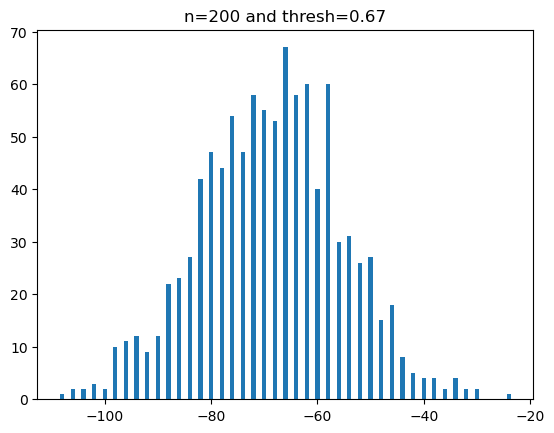

In [30]:
n = 200
thresh = 0.67
N = 1000

result = []
for run_no in range(N):
    i = 0
    for phi in range(n):
        p = random.random()
        if p > thresh:  # heads
            i += 1
        else:  # tails
            i -= 1
    result.append(i)
values, counts = np.unique(result, return_counts=True)
plt.bar(x=values, height=counts)
plt.title("n=200 and thresh=0.67")
plt.show()

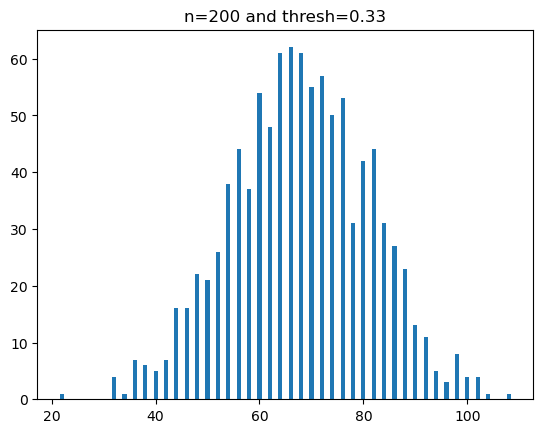

In [4]:
n = 200
thresh = 0.33
N = 1000

result = []
for run_no in range(N):
    i = 0
    for phi in range(n):
        p = random.random()
        if p > thresh:  # heads
            i += 1
        else:  # tails
            i -= 1
    result.append(i)
values, counts = np.unique(result, return_counts=True)
plt.bar(x=values, height=counts)
plt.title("n=200 and thresh=0.33")
plt.show()

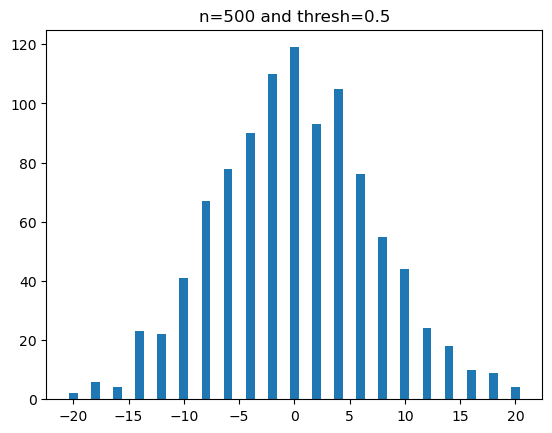

In [5]:
n = 50
thresh = 0.5
N = 1000

result = []
for run_no in range(N):
    i = 0
    for phi in range(n):
        p = random.random()
        if p > thresh:  # heads
            i += 1
        else:  # tails
            i -= 1
    result.append(i)
values, counts = np.unique(result, return_counts=True)
plt.bar(x=values, height=counts)
plt.title("n=500 and thresh=0.5")
plt.show()

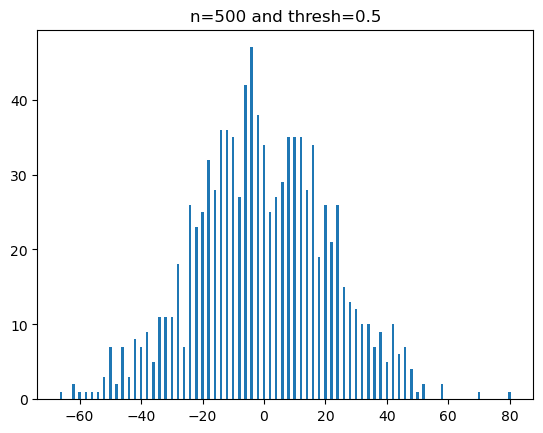

In [6]:
n = 500
thresh = 0.5
N = 1000

result = []
for run_no in range(N):
    i = 0
    for phi in range(n):
        p = random.random()
        if p > thresh:  # heads
            i += 1
        else:  # tails
            i -= 1
    result.append(i)
values, counts = np.unique(result, return_counts=True)
plt.bar(x=values, height=counts)
plt.title("n=500 and thresh=0.5")
plt.show()

## Stationary Distribution

### Theoretical question 11 :

In a Markov chain, the transition matrix represents the probabilities of transitioning from one state to another. If we denote the transition matrix as P, then the stationary distribution, denoted as π, satisfies the equation:

$\pi * P = \pi$,

where $\pi$ is a row vector representing the probabilities of being in each state in the long run.

Now, let's consider the eigenvectors of the transition matrix $P$. An eigenvector $v$ of $P$ satisfies the equation:

$P * v = \lambda * v$,
ش
where $\lambda$ is the corresponding eigenvalue.

Here's the key connection: The stationary distribution π is actually the eigenvector corresponding to the eigenvalue 1 of the transition matrix $P$.

To prove the existence of the stationary distribution, we need to show that the eigenvalue 1 exists and has a corresponding eigenvector. This can be done by considering the properties of the transition matrix $P$.

First, the transition matrix $P$ is a stochastic matrix, meaning that each row sums to 1. This property ensures that there is at least one eigenvalue equal to 1.

Second, if the Markov chain is irreducible and aperiodic, then the eigenvalue 1 has multiplicity 1, meaning it has only one corresponding eigenvector. Irreducibility means that it is possible to reach any state from any other state in a finite number of steps, and aperiodicity means that the chain does not exhibit a regular pattern in its transitions.

Under these conditions, we can conclude that the stationary distribution definitely exists and is represented by the eigenvector corresponding to the eigenvalue 1 of the transition matrix.


### Theoretical question 12 :

To show that a steady state Markov chain has a unique stationary distribution, we need to prove two things: the existence of a limiting distribution and the independence of the limiting distribution from the initial distribution.

First, let's discuss the existence of a limiting distribution. The limiting distribution, denoted as $\pi$, is a probability distribution over the states of a Markov chain. It satisfies the following equation:

$\pi = \pi P$

Where $\pi$ is a row vector representing the probabilities of being in each state, and $P$ is the transition matrix of the Markov chain. The transition matrix P describes the probabilities of transitioning from one state to another.

To find the limiting distribution, we solve the equation $\pi = \pi P$. This equation represents a set of linear equations, where each equation corresponds to the sum of probabilities of transitioning to state $i$ multiplied by the probability of being in state $i$. Solving this system of equations gives us the unique limiting distribution $\pi$.

Now, let's move on to the independence of the limiting distribution from the initial distribution. For any two probability distributions $\pi_0$ and $\pi_1$ representing the initial distributions, if both distributions satisfy the equation $\pi_0 = \pi_0P$ and $\pi_1 = \pi_1P$, then the limiting distributions $\pi_0$ and $\pi_1$ will be the same. This means that the stationary distribution is independent of the initial distribution.

While it is true that a steady state Markov chain has a unique stationary distribution, the converse is not necessarily true. There can be Markov chains that have a unique stationary distribution but are not in a steady state.

To illustrate this, consider a simple example of a Markov chain with two states: A and B. The transition matrix $P$ for this Markov chain is as follows:

$ P = \begin{bmatrix} 0.5 & 0.5 \\ 0.2 & 0.8 \end{bmatrix} $

In this example, the Markov chain does have a unique stationary distribution, which we can calculate by solving the equation $\pi = \pi P$. The stationary distribution is given by $\pi = [0.3333, 0.6667]$. However, this Markov chain is not in a steady state because the state probabilities are not constant over time.

If we start with an initial distribution $\pi_0 = [1, 0]$, representing that we are in state A at the beginning, the state probabilities will evolve as follows over multiple steps:

Step 1: $(\pi_1 = \pi_0P = [0.5, 0.5])$ \
Step 2: $(\pi_2 = \pi_1P = [0.35, 0.65])$\
Step 3: $(\pi_3 = \pi_2P = [0.305, 0.695])$\
... and so on.

As we can see, the state probabilities keep changing over time, indicating that the Markov chain is not in a steady state.

### Theoretical question 13 :

To determine if the chain is irreducible, we need to check if all states communicate with each other. Two states communicate if there is a positive probability of going from one state to the other in a finite number of steps.
In this case, since any state can go to any other state in a finite number of steps, the chain is irreducible.

Now we want to find the period. The period of a state in a Markov chain is defined as the greatest common divisor (GCD) of the lengths of all possible paths that return to the state.

In this specific Markov chain, we can observe that every state has a self-loop with a transition probability of either p or q. This means that each state is recurrent and has a period of 1.

When all states have a period of 1, the GCD of these periods is also 1. Therefore,the period of the chain is 1.

### Simulation question 3 :

In [7]:
p = 0.5
s = 0
N = 10
for i in range(100000):
    d = np.random.binomial(1, p, size=1)
    if (0 < s < N and d[0]==0):
        s=s-1
    if (s == N and d[0]==0):
        s=s-1
    if (s == 0 and d[0]==1):
        s=s+1
    if (0 < s< N and d[0]==1):
        s=s+1
    
print('final state is: ' + str(s));

q = 0.5
p=0.5
mat = [
    [q, p, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [q, 0, p, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, q, 0, p, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, q, 0, p, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, q, 0, p, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, q, 0, p, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, q, 0, p, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, q, 0, p, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, q, 0, p, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, q, 0, p],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, q, p],
    ]
pi = sp.Matrix(mat).eigenvects()

sp.Matrix(mat)


final state is: 5


Matrix([
[0.5, 0.5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[0.5,   0, 0.5,   0,   0,   0,   0,   0,   0,   0,   0],
[  0, 0.5,   0, 0.5,   0,   0,   0,   0,   0,   0,   0],
[  0,   0, 0.5,   0, 0.5,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 0.5,   0, 0.5,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 0.5,   0, 0.5,   0,   0,   0,   0],
[  0,   0,   0,   0,   0, 0.5,   0, 0.5,   0,   0,   0],
[  0,   0,   0,   0,   0,   0, 0.5,   0, 0.5,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 0.5,   0, 0.5,   0],
[  0,   0,   0,   0,   0,   0,   0,   0, 0.5,   0, 0.5],
[  0,   0,   0,   0,   0,   0,   0,   0,   0, 0.5, 0.5]])

In [8]:
for i in range(10):
    ss = np.array(pi[i][2])
    out = ss.sum()
    print('sum'+ str(i)+'= ' + str(out))

sum0= -4.85722573273506e-17
sum1= -1.38777878078145e-17
sum2= -5.55111512312578e-17
sum3= -2.77555756156289e-17
sum4= 5.55111512312578e-17
sum5= 0
sum6= -5.55111512312578e-17
sum7= -5.55111512312578e-17
sum8= 3.31662479035540
sum9= -1.11022302462516e-16


**Explanation:**
we started from 0 and we wanted to produce bernouli random variable to move forward with probability p if random variable was 1 and move backward with probability 1-p if random variable was 0 (except point 0 and N) so we used np.random.binomial(1,p) to produce bernouli random variable and sit is our situation variable.

sum of none of eigenvectors is equal to one so the problem has no steady state.

## Hitting Time

### Simulation question 4 :

In [9]:
import numpy as np
import random

N = 10000
result = []
for run_no in range(N):
    i = 1
    transition_count = 0
    while i < 5:
        p = random.random()
        if i == 1:
            if p <= 0.25:
                i = 2
            elif 0.25 < p <= 0.5:
                i = 3
            elif 0.5 < p <= 0.75:
                i = 4
            elif 0.75 < p <= 1:
                i = 5
            transition_count += 1
        elif i == 2:
            if p <= 1 / 3:
                i = 3
            elif 1 / 3 < p <= 2 / 3:
                i = 4
            elif 2 / 3 < p <= 1:
                i = 5
            transition_count += 1
        elif i == 3:
            if p <= 0.5:
                i = 4
            elif 0.5 < p <= 1:
                i = 5
            transition_count += 1
        elif i == 4:
            i = 5
            transition_count += 1
    result.append(transition_count)

print("Mean number of transitions to get from state 1 to 5:", np.mean(result))


Mean number of transitions to get from state 1 to 5: 2.0838


### Theoretical Question 15:

*Proof*. First we show that $h^A$ satisfies $(1.3)$. If $X
_0 = i \in A$, then $H^A = 0$, so $h_i^A = 1$. If $X_0 = i \notin A$, then $H_A ≥ 1$, so by the Markov property
 $$P_i (H^A<\infty~|~X_1=j) = P_j (H^A <\infty) = h_j^A$$
and
$$h_i^A = P_i (H^A < \infty) = \sum_{j\in I} P_i (H^A < \infty, X_1 =j)\\
=\sum_{j\in I}P_i (H^A < \infty~|~ X_1 =j)P(X_1=j)=\sum_{j\in I} p_{ij} h_j^A$$
Suppose now that $x = (x_i : i \in I)$ is any solution to $(1.3)$. Then $h_i^A = x_i = 1$ for $i \in A$. Suppose $i \notin A$, then
$$x_i=\sum_{j\in I} p_{ij}x_j = \sum_{j \in A}p_{ij} + \sum_{j \notin A} p_{ij}x_j.$$
Substitute for $x_i$  to obtain
$$x_i = \sum_{j \in A} p_{ij} + \sum_{j \notin A} p_{ij} 
(\sum_{k \in A} p_{jk} + \sum_{k \notin A} p_{jk}x_k)\\
=P_i (X_1 \in A) + P_i (X_1 \notin A, X_2 \in A) + \sum_{j \notin A}\sum_{k \notin A} p_{ij} p_{jk} x_k.$$
By repeated substitution for $x$ in the final term we obtain after $n$ steps
$$x_i = P_i(X_i \in A) + \dots + P_i(X_1 \notin A, \dots, X_{n-1} \notin A, X_n \in A) \\
+ \sum_{j_1 \notin A}\cdots \sum_{j_n \notin A} p_{ij_1}p_{j_1j_2}\dots p_{j_{n-1}j_n}x_{j_n}$$
Now if $x$ is non-negative, so is the last term on the right, and the remaining terms sum to $P_i(H^A\leq n)$. So $x_i > P_i(H^A \leq n)$ for all $n$ and then
$$x_i \geq \lim_{n \to \infty} P_i (H^A \leq n) = P_i (H^A < \infty) = h_i$$

### Theoretical Question 16:

*Proof*. First we show that $k^A$ satisfies $(1.4)$. If $X_0 = i \in A$, then $H^A = 0$, so $k_i^A = 0$. If $X_0 = i \notin A$, then $H^A \geq 1$, so, by the Markov property,
$$E_i = (H^A ~|~ X_1 = j ) = 1 + E_j (H^A)$$
and
$$\begin{align*}
k_j^A &= E_j (H^A) = \sum_{j \in I} E_j (H^A ~|~ {X_1=j})\\
&=\sum_{j \in I}E_j (H^A ~|~ X_1 = j) P_i(X_1= j) = 1+ \sum_{j \notin A} p_{ij} k_j^A.
\end{align*}$$
Suppose now that $y = (y_i: i \in I)$ is any solution to $(1.4)$. Then $k_i^A = y_i = 0$ for $i \in A$. If $i \notin A$, then
$$\begin{align*}
y_i &=1 + \sum_{j \notin A} p_{ij} y_j \\
&= 1 + \sum_{j \notin A} p_{ij} \left(1 + \sum_{k \notin A} p_jk y_k\right)\\
&=P_i(H^A \geq 1) + P_i (H^A \geq 2) + \sum_{j \notin A} \sum_{k \notin A} p_{ij} p_{jk} y_k
\end{align*}$$
By repeated substitution for $y$ in the final term we obtain after $n$ steps
$$y_ i = P_i (H^A \geq 1) + \dots + P_i (H^A \geq n) + \sum_{j_1 \notin A} \cdots \sum_{j_n \notin A}p_{ij_1} p_{j_1j_2}\dots p_{j_{n-1}j_n} y_{j_n}$$
So, if $y$ is non-negative,
$$y_i \geq P_i(H^A \geq 1) + \dots + P_i(H^A \geq n)$$
and, letting $n \to \infty$
$$y_i \geq \sum_{n=1}^\infty P_i(H^A \geq n) = E_i (H^A) = x_i.$$

### Theoretical Question 17:

**Finding $h^{4}$:**

Let $h_{i4} = P$(hit state 4, starting from state $i$ ). 
Clearly,

$h_{14} = 0$

$h_{44} = 1$

Using first-step analysis, we also have:

$h_{24} = 1\times h_{34} + 1 \times 0$

$h_{34} = 1 + 1\times h_{24}$

Solving,

$h_{34} = \frac {1}{2} + \frac {1}{2} (\frac {1}{2}h_{34}) \Rightarrow h_{34} = \frac {2}{3} $

so also,

$h_{24} = \frac {1}{2} h_{34} = \frac {1}{3}$

So the vector of hitting probabilities is

$$\mathbf{h^{\{4\}}} = \begin{pmatrix} 0 \\ \frac{1}{3} \\ \frac{2}{3} \\ 1 \end{pmatrix}$$


**Finding $k^{\{1,4\}}$:**

we have:

$k_1^{\{1,4\}}~=~k_4^{\{1,4\}}~=~0$

also we have:

$k_2^{1,4} = 1 + \frac{1}{2} k_1^{1, 4} + \frac{1}{2} k_3^{1, 4}=1 + \frac{1}{2} k_3^{1, 4}$

$k_3^{1,4} = 1 + \frac{1}{2} k_2^{1, 4} + \frac{1}{2} k_4^{1, 4}=1 + \frac{1}{2} k_4^{1, 4}$

so we have:

$k_2^{1,4}~=~k_3^{1,4}~=~2$

### Theoretical Question 18:

$$k_m^n = \begin{cases}
0 & \text{if}~m=n\\
1 + \sum_{j\neq n}p_{mj}k_{jn} & \text{if}~m\neq n
\end{cases}$$

$$k_1^3 ~=~ 1~+~0.8k_1^3~+~0.1k_2^3$$

$$k_1^2 ~=~1~+~0.8k_1^2~+~0.1k_3^2$$

$$k_2^1 ~=~1~+~0.7k_2^1~+~0.2k_3^1$$

$$k_2^3 ~=~1~+~0.1k_1^3~+~0.7k_2^3$$

$$k_3^1 ~=~1~+~0.4k_2^1~+~0.5k_3^1$$

$$k_3^2 ~=~1~+~0.1k_1^2~+~0.5k_3^2$$

solving this equations, we have:

$$k_1^2 ~=~ \frac{20}{3}$$

$$k_1^3 ~=~8$$

$$k_2^1 ~=~10$$

$$k_2^3 ~=~6$$

$$k_3^1 ~=~10$$

$$k_3^2 ~=~\frac{10}{3}$$

the stationary distribution for Markov Chain with transition matrix P is: $\pi=\pi P$

so we have:

$$(\pi_1 \quad \pi_2 \quad \pi_3)=(\pi_1 \quad \pi_2 \quad \pi_3)\begin{pmatrix}
0.8 & 0.1 & 0.1\\
0.1 & 0.7 & 0.2\\
0.1 & 0.4 & 0.5\\
\end{pmatrix}$$

one of the answers of this equation is:

$$\pi=\left(\frac{7}{5} \quad \frac{9}{5} \quad 1\right)$$

using $k_i=\frac{1}{\pi_i}$:

$$k=\left(\frac{5}{7} \quad \frac{5}{9} \quad 1\right)$$

## Game Theory

### Theoretical question 19 :

This famous mystry is called The Prisoner's Dilemma.
In this situation each prisoner has two options, either staying silent (cooperating) or confessing (defecting)

Here's the payoff matrix based on each prironer's decision : 

|          | **Pat Cooperates** | **Pat Defects** |
|:---                |:---:     |:---:            |
| **Mat Cooperates** | 1y / 1y  | 20y / 0y        |
| **Mat Defects**    | 0y / 20y | 5y / 5y         |

The ideal decision for both of theme would be to cooaperate, that is the best option for the group (if we add totall number of years in prison).

Now, let's consider the best decision for each individual. from mat's perspective if he thinks pat is going to cooperate, then mat should defect so he can go free (going free is better than 1 year in jail). if mat thinks pat is going to defect, then mat should definitly defect (5 years in jail is better than 20 years).
And Similarly, Pat faces the same dilemma: defecting could lead to going free if Mat cooperates, but it could also result in a 5 year sentence if Mat also defects.

They should've both cooperated but from an individual stand point, they notice they can always gain from defecting regardless of the other prisoner's choice (if they have no control over the other one's decision). so they'll both defect to try to better their own situation, but come away not only hurting the group but themselves.

The Nash equilibrium in this case is reached when both prisoners defect (confess). It is a situation where no prisoner can benefit by unilaterally changing their strategy. If one prisoner were to switch to cooperating (staying silent), they would risk receiving a harsher sentence if the other prisoner defects. Therefore, both prisoners defecting is the stable outcome, even though it is not the best overall outcome for them.

### Theoretical question 20 : 

#### A :

To find the Nash equilibrium in this penalty game between Putin and Zelenski, we need to identify the best responses for each player regardless of the other player's choice.

Here's the probability matrix :

|          | **Z DR** | **Z DL** |
|:---                |:---:     |:---:            |
| **P SL** | 0.8   | 0.15        |
| **P SR**    | 0.2 | 0.95       |

And here's the payoff matrix based on the probability matrix : 

|          | **Z DR** | **Z DL** |
|:---                |:---:     |:---:            |
| **P SL** | 0.8 / 0.2  | 0.15 / 0.85        |
| **P SR**    | 0.2 / 0.8 | 0.95 / 0.05         |

To find Pat's best response, we need to determine which strategy maximizes Putin's chance of scoring a goal. Putin will choose the strategy with the highest probability of scoring in each row which is shooting right with the average scoring probability of 57.5% (shooting left has the average scoring probability of 47.5%).

Now let's find Zelenski's best response. Zelenski will choose the strategy that minimizes Putin's chance of scoring a goal. Zelenski will select the strategy with the highest probability of catching in each column which is diving right the average catching probability of 50% (diving left has the average catching probability of 45%).

The Nash equilibrium is reached when both players are playing their best responses to each other. In this case, the Nash equilibrium occurs when Putin shoots right (SR) and Zelenski dives right (DR).

#### B :

we do exactly the same for this case as well. 

Here's the probability matrix :

|          | **Z DR** | **Z DL** |
|:---                |:---:     |:---:            |
| **P SL** | 0.8   | 0.15        |
| **P SM** | 0.5   | 0.5        |
| **P SR**    | 0.2 | 0.95       |

And here's the payoff matrix based on the probability matrix : 

|          | **Z DR** | **Z DL** |
|:---                |:---:     |:---:            |
| **P SL** | 0.8 / 0.2  | 0.15 / 0.85        |
| **P SM** | 0.5 / 0.5  | 0.5 / 0.5       |
| **P SR**    | 0.2 / 0.8 | 0.95 / 0.05         |

average scoring probability if Putin shoots left : 47.5%
average scoring probability if Putin shoots in the middle : 50%
average scoring probability if Putin shoots right : 57.5%
so the best choice for Putin would be to shoot right just like the previous part.

average catching probability if Zelenski dives right : 50%
average catching probability if Zelenski dives left : 53.4%
so the best choice for Zelenski would be to dive left.

The Nash equilibrium is reached when both players are playing their best responses to each other. In this case, the Nash equilibrium occurs when Putin shoots right (SR) and Zelenski dives left (DL).

#### C :

In this part we have a mixed strategy situation. 
here's the payoff matrix:

|          | **P Left (p)** | **P Right (1-p)** |
|:---                |:---:     |:---:            |
| **Z Left (q)** | x / 2  | 0 / 0        |
| **Z Right (1-q)** | 0 / 0  | 2 / 2       |

the payoff function for each individual :

$\pi_{1}(p,q) = x \cdot p \cdot q + 2 \cdot (1 - p) \cdot (1 - q)$

$\pi_{2}(p,q) = 2 \cdot p \cdot q + 2 \cdot (1 - p) \cdot (1 - q)$

now if we derivate $\pi_{1}(p,q)$ with respect to q and set it equal to zero we have:

(we set it equal to zero because we want it to be indifferent respect to q)

$$x \cdot p + 2 \cdot (p - 1) = 0$$
$$p = \frac{{2}}{{x + 2}}$$

and if we derivate $\pi_{2}(p,q)$ with respect to p and set it equal to zero we have:

(we set it equal to zero because we want it to be بی تفاوت respect to p)


$$2 \cdot q + 2 \cdot (q - 1) = 0$$
$$q = \frac{{1}}{{2}}$$

### Theoretical question 21 : 

#### A :
This matrix represents a simple two-player game known as the "Rock-Paper-Scissors" game. In this game, each player has three possible strategies: Rock, Paper, or Scissors, and they play against each other once.

The rows represent the strategies of the first player (Farhad), and the columns represent the strategies of the second player (Parsa). The values in the matrix represent the outcomes of the game:

- If both players choose the same strategy, the game is a tie, and both get 0 points.
- If the first player's strategy defeats the second player's strategy, the first player gets 1 point, and the second player gets -1 point.
- If the second player's strategy defeats the first player's strategy, the first player gets -1 point, and the second player gets 1 point.

Let's analyze the matrix:

1. If both players choose Rock (R), it results in a tie (0 points each).
2. If both players choose Paper (P), it results in a tie (0 points each).
3. If both players choose Scissors (S), it results in a tie (0 points each).
4. If the first player chooses Rock (R) and the second player chooses Paper (P), the second player wins (1 point for Parsa, -1 point for Farhad).
5. If the first player chooses Rock (R) and the second player chooses Scissors (S), the first player wins (1 point for Farhad, -1 point for Parsa).
6. If the first player chooses Paper (P) and the second player chooses Rock (R), the first player wins (1 point for Farhad, -1 point for Parsa).
7. If the first player chooses Paper (P) and the second player chooses Scissors (S), the second player wins (1 point for Parsa, -1 point for Farhad).
8. If the first player chooses Scissors (S) and the second player chooses Rock (R), the second player wins (1 point for Parsa, -1 point for Farhad).
9. If the first player chooses Scissors (S) and the second player chooses Paper (P), the first player wins (1 point for Farhad, -1 point for Parsa).

Since each player can only choose one strategy in each game, they cannot accumulate points from multiple games. Thus, in each game, one player wins, and the other loses, with no possibility of a tie in a single game.

This matrix shows that the game is a "zero-sum" game, meaning the sum of the players' payoffs in each game is always zero. For example, if Farhad wins and gains 1 point, Parsa loses 1 point. The total payoff remains zero.

The Nash equilibrium in this game occurs when both players choose their strategies to maximize their expected payoff, assuming their opponent is doing the same. In this case, there is no pure Nash equilibrium because, in any specific game, one player wins and the other loses. However, there is a mixed Nash equilibrium, where both players randomly choose their strategies with equal probabilities. In the long run, this balanced random strategy will result in each player winning, losing, and tying approximately one-third of the games.

#### B :
In this part, with the given strategy vectors, technically we're playing with pure strategy. 

Farhad's pure strategy (rock) : $\sigma_r = (1~0~0)^T$

Parsa's pure strategy (paper) : $\sigma_c = (0~1~0)^T$

in this case we can easily conclude that Parsa is going to win and Farhad is going to lose, so the utilities will be like this :

$U_r = -1$  and  $U_c = 1$

Using the matrises we can achive the same results : 

The payoff matrix : 

|          | **P2 rock** | **P2 paper** | **P2 scissor** |
|:---      |:---:        |:---:         |:---:           |
| **P1 rock** |  0 / 0   | -1 / 1       | 1 / -1         |
| **P1 paper** | 1 / -1  | 0 / 0        | -1 / 1         |
| **P1 scissor** | -1 / 1| 1 / -1       |0 / 0           |

$U_r = \sigma_r\cdot A \cdot \sigma_c = (1~0~0) \cdot \begin{bmatrix}
0 & -1 & 1 \\
1 & 0 & -1 \\
-1 & 1 & 0 \\
\end{bmatrix} \cdot (0~1~0)^T = -1$

$U_c = \sigma_c \cdot A \cdot \sigma_r = (0~1~0) \cdot \begin{bmatrix}
0 & -1 & 1 \\
1 & 0 & -1 \\
-1 & 1 & 0 \\
\end{bmatrix} \cdot (1~0~0)^T = 1$

#### C : 

In this part we have a mixed strategy situation.

Mixed strategy : $\sigma_cp = (0.25~0.35~0.4)^T$

To calculate the expected value of utility for each player, we need to multiply the mixed strategy vector of one player with the game matrix and the transpose of the mixed strategy vector of the other player. 

The expected utility for Farhad can be calculated as follows:

Expected utility for Farhad = $\sigma_cp\cdot A \cdot \sigma_cp^T$

$= (0.25~0.35~0.4) \cdot \begin{bmatrix}
0 & -1 & 1 \\
1 & 0 & -1 \\
-1 & 1 & 0 \\
\end{bmatrix} \cdot(0.25~0.35~0.4)^T = (0.25\cdot0 + 0.35\cdot1 + 0.4\cdot(-1))\cdot0.25 + (0.25\cdot(-1) + 0.35\cdot0 + 0.4\cdot1)\cdot0.35 + (0.25 \cdot1 + 0.35\cdot(-1) + 0.4\cdot0)\cdot0.4 = (-0.05)\cdot 0.25 + (0.15)\cdot0.35 + (-0.1)\cdot0.4 = -0.0125 + 0.0525 - 0.04 = 0$


Therefore, the expected value of utility for Farhad is 0.

Similarly, we can calculate the expected value of utility for Parsa by using transposed Game Matrix $A^T$:

Expected utility for Parsa = $\sigma_cp\cdot A^T \cdot \sigma_cp^T$

$= (0.25~0.35~0.4) \cdot \begin{bmatrix}
0 & -1 & 1 \\
1 & 0 & -1 \\
-1 & 1 & 0 \\
\end{bmatrix}^T \cdot(0.25~0.35~0.4)^T = (0.25\cdot0 + 0.35\cdot(-1) + 0.4\cdot1)\cdot0.25 + (0.25\cdot1 + 0.35\cdot0 + 0.4\cdot(-1))\cdot0.35 + (0.25 \cdot(-1) + 0.35\cdot1 + 0.4\cdot0)\cdot0.4 = 0.05\cdot 0.25 + (-0.15)\cdot0.35 + 0.1\cdot0.4 = 0.0125 - 0.0525 + 0.04 = 0$

Therefore, the expected value of utility for Parsa is also 0.

Both Farhad and Parsa are expected to have a utility of 0 when they play with the mixed strategy $\sigma_cp = (0.25~0.35~0.4)^T$.

#### D :

To find the Nash equilibrium for this game, we need to identify any strategies where neither player has an incentive to unilaterally deviate from their chosen strategy.

In this game, we have a 3x3 game matrix:

$$ A = \begin{pmatrix} 0 & -1 & 1 \\ 1 & 0 & -1 \\ -1 & 1 & 0 \end{pmatrix} $$

To find the Nash equilibrium, we can check for any pure strategy pairs where both players' utilities are maximized. Additionally, we can check for any mixed strategy pairs where the players' mixed strategies are best responses to each other.

Let's analyze the game matrix to find the Nash equilibrium:

1. Pure Strategy Nash Equilibrium:
   - There is no pure strategy Nash equilibrium in this game because for each row and column, there is always at least one element that is greater than or less than the other elements.

2. Mixed Strategy Nash Equilibrium:
   - To find the mixed strategy Nash equilibrium, we can check for best responses. A mixed strategy is a best response if the player is indifferent between all available pure strategies when facing the opponent's mixed strategy.
   
   - Let's consider the mixed strategy for Farhad, w = (w1, w2, w3), where w1, w2, and w3 represent the probabilities of playing the corresponding pure strategies.
   - Similarly, let's consider the mixed strategy for Parsa, x = (x1, x2, x3), where x1, x2, and x3 represent the probabilities of playing the corresponding pure strategies.
   
   - For Farhad's best response, we need to find the values of w1, w2, and w3 that maximize Farhad's expected utility when facing Parsa's mixed strategy.
   - Farhad's expected utility is given by: E(Farhad) = w^T * A * x
   
   - Similarly, for Parsa's best response, we need to find the values of x1, x2, and x3 that maximize Parsa's expected utility when facing Farhad's mixed strategy.
   - Parsa's expected utility is given by: E(Parsa) = x^T * A^T * w
   
   - By solving these equations simultaneously, we can find the mixed strategy Nash equilibrium, where both players' mixed strategies are best responses to each other.
   
Solving the equations is a computational process, and it can be done using numerical methods or software tools like a linear programming solver. The resulting Nash equilibrium probabilities will indicate the equilibrium strategies for both Farhad and Parsa.
   $U_1 = (x_1~x_2~x_3) \cdot \begin{bmatrix}
0 & -1 & 1 \\
1 & 0 & -1 \\
-1 & 1 & 0 \\
\end{bmatrix} \cdot(y_1~y_2~y_3)^T =  x_2\cdot(y_1 - y_3) + x_1\cdot(y_3 - y_2) + x_3\cdot(y_2 - y_1)$

Taking the derivative of $ U_1 $ with respect to each time $ x_1 , x_2 , x_3 $ and set them equal to zero, we have:
$$ y_1 = y_2 = y_3 $$
similarly for $ U_2 $ we will have :
$$ x_1 = x_2 = x_3 $$

we also know that :
$$ x_1 + x_2 + x_3 = 1$$
$$ y_1 + y_2 + y_3 = 1$$

so we conclude that the Nash equilibrium happens when the probability of rock paper or scissors are equal to $ \frac{{1}}{{3}}$.

in conclusion Nash equilibrium happens when the mixed stategies for Parsa and Farhad are as follows:
$$ x = (\frac{{1}}{{3}}~~\frac{{1}}{{3}}~~\frac{{1}}{{3}})$$
$$ y = (\frac{{1}}{{3}}~~\frac{{1}}{{3}}~~\frac{{1}}{{3}})$$
   


### Theoretical question 22 : 

To find the Nash equilibrium in this game, we need to determine the mixed strategies for each player where no player has an incentive to unilaterally deviate from their chosen strategy.

Let's start by analyzing the utility functions for each player:

Player A's utility function: $ U_1(y_1, y_2, y_3) = y_1 + y_1 \cdot y_2 - y_1^2 $

Player B's utility function: $ U_2(y_1, y_2, y_3) = y_2 + y_1 \cdot y_2 - y_2^2 $

Player C's utility function: $ U_3(y_1, y_2, y_3) = (10 - y_1 - y_2 - y_3) \cdot y_3 $

To find the Nash equilibrium, we can find the best response for each player against the strategies of the other players. A mixed strategy is a best response if the player is indifferent between all available pure strategies when facing the opponent's mixed strategy.

Let's consider Player A's best response:

To find Player A's best response, we need to maximize Player A's expected utility against the mixed strategies of Players B and C. 

Taking the derivative of $ U_1 $ with respect to $ y_1 $, we have:
$\frac{{dU_1}}{{dy_1}} = 1 + y_2 - 2y_1 $

Setting $ \frac{{dU_1}}{{dy_1}} $ equal to zero to find the maximum, we get:
$$ 1 + y_2 - 2y_1 = 0 $$
$$ y_1 = \frac{{1 + y_2}}{2} $$

Similarly, we can find Player B's best response:

Taking the derivative of $ U_2 $ with respect to $ y_2 $, we have:
$$ \frac{{dU_2}}{{dy_2}} = 1 + y_1 - 2y_2 $$

Setting $ \frac{{dU_2}}{{dy_2}} $ equal to zero, we get:
$$ 1 + y_1 - 2y_2 = 0 $$
$$ y_2 = \frac{{1 + y_1}}{2} $$

Finally, let's find Player C's best response:

Taking the derivative of $ U_3 $ with respect to $ y_3 $, we have:
$$ \frac{{dU_3}}{{dy_3}} = (10 - y_1 - y_2 - y_3) - y_3 $$

Setting $\frac{{dU_3}}{{dy_3}} $ equal to zero, we get:
$$ 10 - y_1 - y_2 - 2y_3 = 0 $$
$$y_3 = \frac{{10 - y_1 - y_2}}{2} $$

Now, let's combine the best response strategies for each player:

Player A's best response: $ y_1 = \frac{{1 + y_2}}{2} $

Player B's best response: $ y_2 = \frac{{1 + y_1}}{2} $

Player C's best response: $ y_3 = \frac{{10 - y_1 - y_2}}{2} $

We have a system of equations that can be solved simultaneously to find the Nash equilibrium.

Solving these equations will yield the Nash equilibrium strategies for each.
$$ y_1 = 1$$
$$ y_2 = 1$$
$$ y_3 = 4$$

## !!NashPy

answers to this part is in **Nashpy_sim.ipynb** file.

## Data Analysis 

### Simulation Q5:

Regression line for company 1
intercept: 2.917130706359516
slope: [0.102]
MSE: 0.007958944344492564



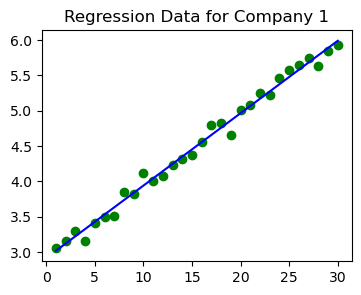

Regression line for company 2
intercept: 2.534195192739582
slope: [0.317]
MSE: 0.10313977132222323



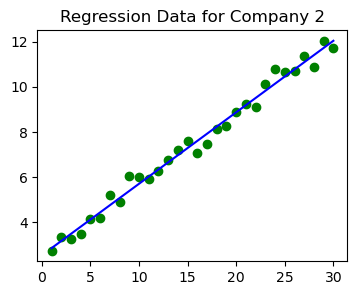

Regression line for company 3
intercept: 2.5647447001280987
slope: [0.51]
MSE: 0.3055643603722597



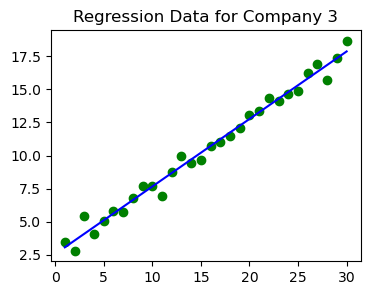

Regression line for company 4
intercept: 2.0633329886311014
slope: [0.719]
MSE: 0.6754097318249723



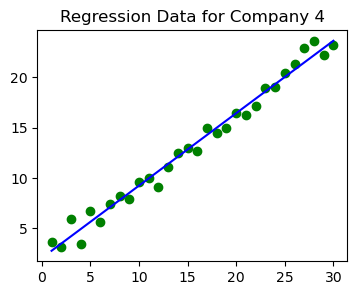

Regression line for company 5
intercept: 1.9053848305109486
slope: [0.937]
MSE: 0.6569624630744754



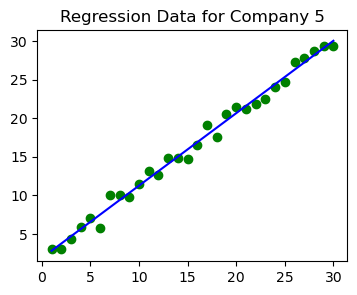

Regression line for company 6
intercept: 2.2878563933285
slope: [1.132]
MSE: 1.0667770387943265



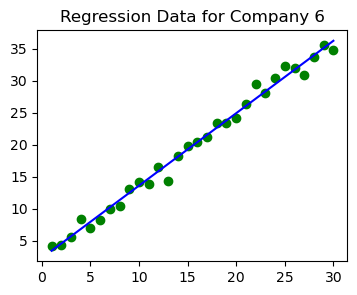

Regression line for company 7
intercept: 2.083617006337807
slope: [1.315]
MSE: 1.2339940042939797



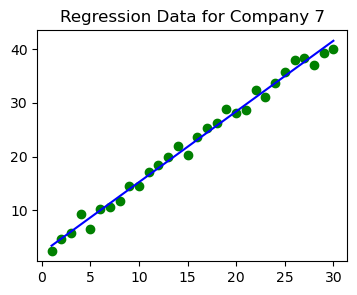

Regression line for company 8
intercept: 1.441025837645995
slope: [1.54]
MSE: 1.7467502679398914



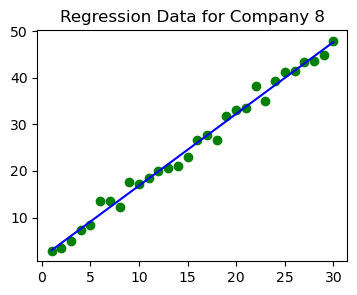

Regression line for company 9
intercept: 1.5900291635494312
slope: [1.735]
MSE: 3.4847495647891154



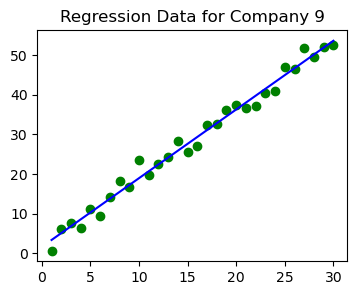

Regression line for company 10
intercept: 0.813761705075958
slope: [1.972]
MSE: 2.918129421724603



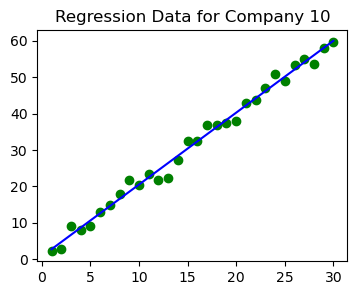

Regression line for company 11
intercept: -0.4625269106396743
slope: [2.24]
MSE: 8.850186457262025



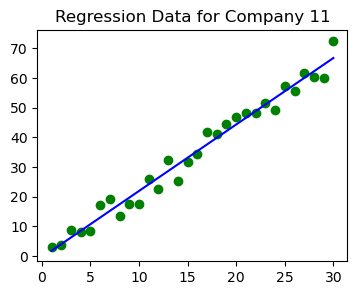

Regression line for company 12
intercept: 0.5927488551312834
slope: [2.41]
MSE: 3.163452249504537



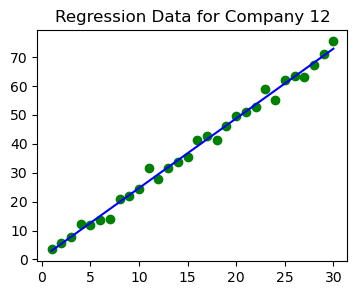

Regression line for company 13
intercept: 0.7303154546099222
slope: [2.592]
MSE: 4.062753728633697



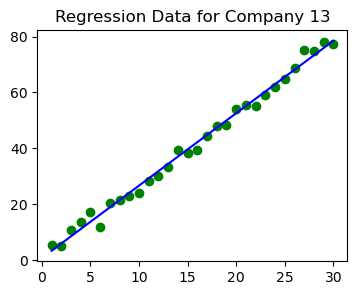

Regression line for company 14
intercept: 0.5426024795552706
slope: [2.773]
MSE: 9.424137728102787



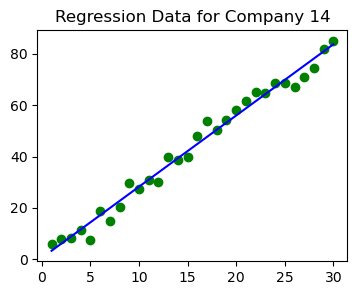

Regression line for company 15
intercept: 0.1391207194158781
slope: [3.004]
MSE: 7.008390906423597



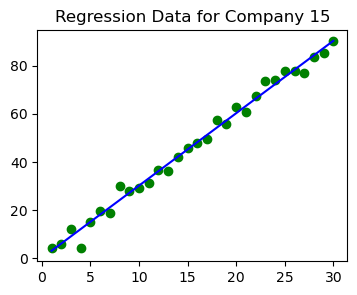

In [3]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

days = np.arange(1, 31)
days = np.expand_dims(days, axis=1)
m = np.zeros(5)


with open("Data.csv", 'r') as file:
    csvreader = csv.reader(file)
    data = np.array(list(csvreader), dtype=float).T  # shape: 15x30

for company_no in range(data.shape[0]):
    company_data = data[company_no]
    reg = LinearRegression()
    reg = reg.fit(days, company_data)
    ypred = reg.predict(days)
    mse = mean_squared_error(company_data, ypred)
    
    print(f"Regression line for company {company_no + 1}")
    print("intercept:", reg.intercept_)
    print("slope:", reg.coef_)
    print("MSE:", mse)
    print()
    
    plt.figure(figsize=(4, 3))
    plt.clf()
    plt.title(f"Regression Data for Company {company_no + 1}")
    plt.plot(days, ypred, color='blue', label='scikit model')
    plt.scatter(days, company_data, c='green', label='actual values')
    plt.show()

### Simulation Q6:

0.0892129157941414
0.3211538125606222
0.5527787625915631
0.8218331532768511
0.810532209769899
1.0328489912830077


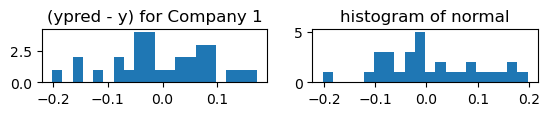

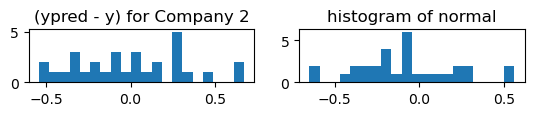

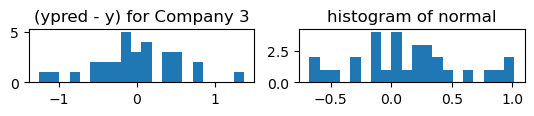

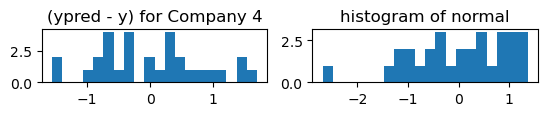

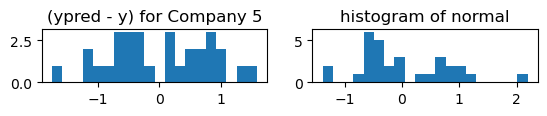

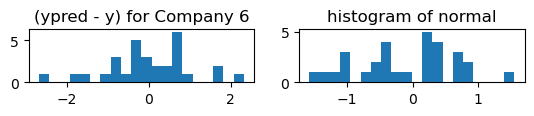

In [4]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

days = np.arange(1, 31)
days = np.expand_dims(days, axis=1)
with open("Data.csv", 'r') as file:
    csvreader = csv.reader(file)
    data = np.array(list(csvreader), dtype=float).T  # shape: 15x30
    
std_est = np.zeros(6)
    
for company_no in range(6):
    
    company_data = data[company_no]
    
    reg = LinearRegression()
    reg = reg.fit(days, company_data)
    ypred = reg.predict(days)
    
    diff_data = company_data - ypred
#     figsize=(4, 3)
    plt.figure()
    plt.subplot ( 6 ,2,2*company_no+1)
    plt.hist(diff_data,bins = 20)
    
    mean_est = np.mean(diff_data)
    std_est[company_no] = np.std(diff_data)
    print(std_est[company_no])
    normal_est = np.random.normal(mean_est , std_est[company_no],len(diff_data))
    plt . title (f'(ypred - y) for Company {company_no + 1}')
    
    plt.subplot (6,2,2*company_no+2)
    plt.hist(normal_est,bins = 20)
    plt . title ('histogram of normal')
    

### Theoretical question 23 : 

In [5]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

days = np.arange(1, 31)
days = np.expand_dims(days, axis=1)

m = np.zeros(6)
U = np.zeros(6)
H = np.zeros(6)
mean = np.zeros(6)
std_est = np.zeros(6)

with open("Data.csv", 'r') as file:
    csvreader = csv.reader(file)
    data = np.array(list(csvreader), dtype=float).T  # shape: 15x30
    

for company_no in range(6):
    company_data = data[company_no]
    reg = LinearRegression()
    reg = reg.fit(days, company_data)
    ypred = reg.predict(days)
    diff_data = company_data - ypred
    
    m[company_no] = reg.coef_
    H[company_no] = 2.1 * (7 - (company_no+1))
    std_est[company_no] = np.std(diff_data)
    
#     mean[company_no] = m[company_no]*(1 + Y/ H[company_no])
#     U[company_no] = np.random.normal(mean[company_no],std_est[company_no])
    
print('H = ',H)
print('m = ',m)
print('estimated std = ',std_est)
print('Variance = ',std_est**2)

H =  [12.6 10.5  8.4  6.3  4.2  2.1]
m =  [0.102 0.317 0.51  0.719 0.937 1.132]
estimated std =  [0.089 0.321 0.553 0.822 0.811 1.033]
Variance =  [0.008 0.103 0.306 0.675 0.657 1.067]


Based on our caculations for $m_i , H_i$ and $\sigma_i^2$, we can reach $u_i$ distribution for each company.

$$m_i = Slope~obtained~from~first~degree~curve~fitting$$

$$H_i = 2.1 \cdot (7 - i)$$

$$ \sigma_i^2 = variance~Q6$$

$$u_i = N(m_i(1 + \frac{{Y}}{{H_i}}),\sigma_i^2)$$

Company 1 : $u_1 = N(0.1(1 + \frac{{Y}}{{12.6}}),0.008)$

Company 2 : $u_2 = N(0.3(1 + \frac{{Y}}{{10.5}}),0.1)$

Company 3 : $u_3 = N(0.5(1 + \frac{{Y}}{{8.4}}),0.3)$

Company 4 : $u_4 = N(0.72(1 + \frac{{Y}}{{6.3}}),0.68)$

Company 5 : $u_5 = N(0.94(1 + \frac{{Y}}{{4.2}}),0.66)$

Company 6 : $u_6 = N(1.13(1 + \frac{{Y}}{{2.1}}),1.07)$

### Theoretical question 24 : 


In [6]:
slopes1 = np.zeros((6,6)) # slopes for utility matrix of the first bank
slopes2 = np.zeros((6,6)) # slopes for utility matrix of the second bank

utility_matrix1 = np.zeros((6,6)) # utility matrix of the first bank
utility_matrix2 = np.zeros((6,6)) # utility matrix of the second bank

b = np.zeros(6)
a = np.zeros(6)

for i in range(6):
    b[i] = np.sqrt(49 - (i+1)**2)
    a[i] = (7 - (i+1))

    
# loop for finding new line slopes for utility matrix
for i in range(6):
    for j in range(6):
        if i == j:
            slopes1[i,j] = m[i] * (1 + (a[i] + b[i]) / H[i]) # expected value of ui
            slopes2[i,j] = m[j] * (1 + (a[j] + b[j]) / H[j]) 
        else:
            slopes1[i,j] = m[i] * (1 + a[i] / H[i])
            slopes2[i,j] = m[j] * (1 + b[j] / H[j])
            

            
# loop for finding each element of utility matrix 
for i in range(6):
    for j in range(6):
        utility_matrix1[i,j] = int(slopes1[i,j] * a[i])
        utility_matrix2[i,j] = int(slopes2[i,j] * b[j])
     
print('a_i = \n',a,'\n')
print('b_i = \n',b,'\n')
print('slopes1 = \n',slopes1,'\n')
print('slopes2 = \n',slopes2,'\n')
print('utility_matrix1 = \n',utility_matrix1,'\n')
print('utility_matrix2 = \n',utility_matrix2,'\n')

a_i = 
 [6. 5. 4. 3. 2. 1.] 

b_i = 
 [6.928 6.708 6.325 5.745 4.899 3.606] 

slopes1 = 
 [[0.207 0.151 0.151 0.151 0.151 0.151]
 [0.468 0.67  0.468 0.468 0.468 0.468]
 [0.752 0.752 1.136 0.752 0.752 0.752]
 [1.062 1.062 1.062 1.718 1.062 1.062]
 [1.384 1.384 1.384 1.384 2.477 1.384]
 [1.671 1.671 1.671 1.671 1.671 3.614]] 

slopes2 = 
 [[0.207 0.519 0.893 1.375 2.031 3.075]
 [0.159 0.67  0.893 1.375 2.031 3.075]
 [0.159 0.519 1.136 1.375 2.031 3.075]
 [0.159 0.519 0.893 1.718 2.031 3.075]
 [0.159 0.519 0.893 1.375 2.477 3.075]
 [0.159 0.519 0.893 1.375 2.031 3.614]] 

utility_matrix1 = 
 [[1. 0. 0. 0. 0. 0.]
 [2. 3. 2. 2. 2. 2.]
 [3. 3. 4. 3. 3. 3.]
 [3. 3. 3. 5. 3. 3.]
 [2. 2. 2. 2. 4. 2.]
 [1. 1. 1. 1. 1. 3.]] 

utility_matrix2 = 
 [[ 1.  3.  5.  7.  9. 11.]
 [ 1.  4.  5.  7.  9. 11.]
 [ 1.  3.  7.  7.  9. 11.]
 [ 1.  3.  5.  9.  9. 11.]
 [ 1.  3.  5.  7. 12. 11.]
 [ 1.  3.  5.  7.  9. 13.]] 



### Simulation Q7:

In [9]:
!pip install nashpy
import numpy as np
import nashpy as nash

game = nash.Game(utility_matrix1, utility_matrix2)

equilibria = game.support_enumeration()

for eq in equilibria:
    print(eq)


(array([0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1.]))
(array([0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 1.]))
(array([0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0.]))
(array([0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 1.]))
(array([-0.   , -0.   ,  0.333,  0.   ,  0.667,  0.   ]), array([ 0. , -0. , -0. ,  0. ,  0.5,  0.5]))
(array([-0.   , -0.   , -0.   ,  0.333,  0.667,  0.   ]), array([ 0. , -0. , -0. ,  0. ,  0.5,  0.5]))


### Simulation Q8:


In [8]:
new_slopes1 = np.zeros((6,6)) # slopes for utility matrix of the first bank
new_slopes2 = np.zeros((6,6)) # slopes for utility matrix of the second bank

new_utility_matrix1 = np.zeros((6,6)) # utility matrix of the first bank
new_utility_matrix2 = np.zeros((6,6)) # utility matrix of the second bank

seed_value = 400101934
np.random.seed(seed_value)

# loop for finding new line slopes for utility matrix
for i in range(6):
    for j in range(6):
        new_slopes1[i,j] = np.random.normal(slopes1[i,j],std_est[i])
        new_slopes2[i,j] = np.random.normal(slopes2[i,j],std_est[j])
        
        
# loop for finding each element of utility matrix 
for i in range(6):
    for j in range(6):
        new_utility_matrix1[i,j] = int(new_slopes1[i,j] * a[i])
        new_utility_matrix2[i,j] = int(new_slopes2[i,j] * b[j])
     

print('new slopes1 = \n',new_slopes1,'\n')
print('new slopes2 = \n',new_slopes2,'\n')
print('new utility_matrix1 = \n',new_utility_matrix1,'\n')
print('new utility_matrix2 = \n',new_utility_matrix2,'\n')

new slopes1 = 
 [[ 0.112  0.112  0.181  0.148 -0.019  0.089]
 [ 0.614  0.643  0.684  0.273  0.967  0.167]
 [ 2.091  0.524  1.997 -0.084  1.169  0.093]
 [ 1.52   0.233  1.829  1.05   1.843  1.307]
 [ 1.373  2.489 -0.439  2.216  0.917  2.636]
 [ 0.775  2.989  1.619  0.435  1.522  2.832]] 

new slopes2 = 
 [[ 0.215  0.275  0.244  0.806  1.106  3.325]
 [ 0.051  1.298  0.434  0.707  2.269  4.041]
 [ 0.132 -0.089  0.016  1.87   1.768  2.334]
 [ 0.162  0.377  1.674 -0.172  2.961  3.131]
 [ 0.241  0.445  1.489  0.401  3.291  3.164]
 [ 0.173  0.303  0.082  1.42   0.528  3.798]] 

new utility_matrix1 = 
 [[0. 0. 1. 0. 0. 0.]
 [3. 3. 3. 1. 4. 0.]
 [8. 2. 7. 0. 4. 0.]
 [4. 0. 5. 3. 5. 3.]
 [2. 4. 0. 4. 1. 5.]
 [0. 2. 1. 0. 1. 2.]] 

new utility_matrix2 = 
 [[ 1.  1.  1.  4.  5. 11.]
 [ 0.  8.  2.  4. 11. 14.]
 [ 0.  0.  0. 10.  8.  8.]
 [ 1.  2. 10.  0. 14. 11.]
 [ 1.  2.  9.  2. 16. 11.]
 [ 1.  2.  0.  8.  2. 13.]] 

